In [1]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w7 - Geometric Transformations and Image Features\data"

## 1 Find Keypoints and Descriptors

In [2]:
MAX_FEATURES = 500
GOO_MATCH_PERCENT = 0.15

In [3]:
im1 = cv2.imread(DATA_PATH + "\\images\\scene\\scene1.jpg")
im2 = cv2.imread(DATA_PATH + "\\images\\scene\\scene3.jpg")

In [4]:
im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [5]:
ORB = cv2.ORB_create(MAX_FEATURES)
kp1, des1 = ORB.detectAndCompute(im1Gray, None)
kp2, des2 = ORB.detectAndCompute(im2Gray, None)

In [6]:
im1Kp = np.array([])
im1Kp = cv2.drawKeypoints(im1, kp1, im1Kp, color = (0,0, 255), flags = 0)

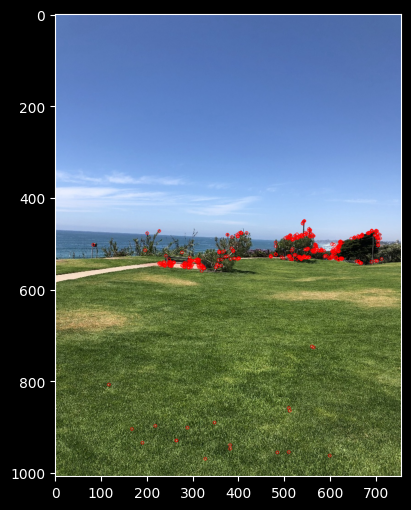

In [8]:
plt.imshow(im1Kp[:,:,::-1]);

## 2 Find matching corresponding points

In [9]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)

In [10]:
matches = sorted(matches, key=lambda x:x.distance, reverse=False)

In [11]:
nGoodMatches = int(len(matches) * GOO_MATCH_PERCENT)
matches = matches[:nGoodMatches]

In [12]:
imMatches = cv2.drawMatches(im1, kp1, im2, kp2, matches, None)

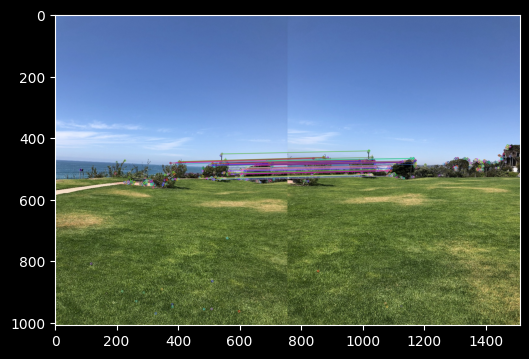

In [14]:
plt.imshow(imMatches[:,:,::-1]);

## 3 Image Alignment using Homography

In [29]:
pts1 = np.zeros((len(matches), 2), dtype = np.float32)
pts2 = np.zeros((len(matches), 2), dtype = np.float32)

In [34]:
for i, match in enumerate(matches):
    pts1[i,:] = kp1[match.queryIdx].pt
    pts2[i,:] = kp2[match.trainIdx].pt

In [35]:
h, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC)

In [36]:
print(h)

[[ 6.27042436e-01 -6.33135615e-02  3.18436186e+02]
 [-2.07449647e-01  7.91231125e-01  8.49774260e+01]
 [-3.97631842e-04 -1.23407296e-04  1.00000000e+00]]


### 4 Warp Image Alignment

In [37]:
im1Height, im1Width, channels = im1.shape
im2Height, im2Width, channels = im2.shape

In [38]:
im2Aligned = cv2.warpPerspective(im2, h, (im2Width + im1Width, im2Height))

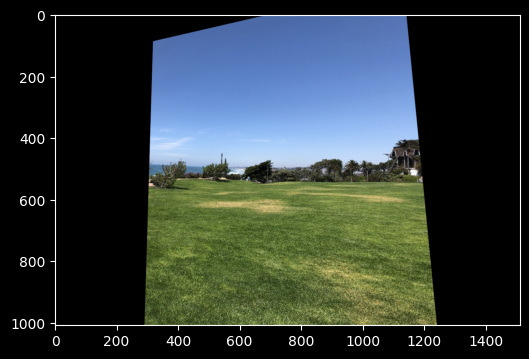

In [39]:
plt.imshow(im2Aligned[:,:,::-1])

### 5 Stitch Image

In [42]:
stitch = np.copy(im2Aligned)
stitch[0:im1Height, 0:im2Width] = im1

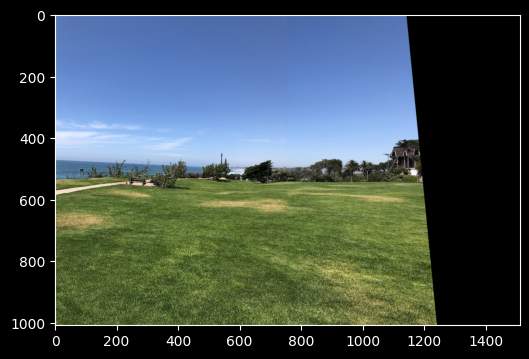

In [44]:
plt.imshow(stitch[:,:,::-1]);